In [1]:
# Notebook to test the following unsupervised methods for different datasets:



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import csv
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from sklearn import linear_model
from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from operator import itemgetter
from itertools import groupby

from unsupervised_methods import *
from evaluation import *

In [3]:
datafile = '/data/project/general/aerosolretriev/Jungfraujoch_data/data/aerosol_data.h5'

In [4]:
df1, df_dates, SDE_events_start, SDE_events_end, df_SDE = read_data_all(datafile)


In [5]:
datasets, df_dates, SDE_events_start, SDE_events_end, df_SDE = read_data(datafile)

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['tot_V'] = df1[df1.columns[173:-1]].sum(axis =1) / (324-173)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new['tot_S'] = df1[df1.columns[23:173]].sum(axis =1) / (173-23)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:206: SettingWithCopyWarning: 
A value is trying to be set

In [6]:
datasets[1]

N_N11  BsB_S12  BsG_S12  BsR_S12  BbsB_S12  BbsG_S12  \
2020-02-08 14:00:00  516.0     1.74     1.20     0.78      0.55      0.10   
2020-02-08 15:00:00  465.0     1.66     0.99     0.44      0.29      0.19   
2020-02-08 16:00:00  401.0     2.08     1.80     1.83      0.11      0.06   
2020-02-08 17:00:00  411.0     1.18     0.77     0.57      0.48     -0.10   
2020-02-08 18:00:00  452.0     1.27     1.17     0.76      0.17      0.01   
...                    ...      ...      ...      ...       ...       ...   
2020-11-24 23:00:00  349.0     1.08     0.98     0.90      0.18      0.08   
2020-11-25 00:00:00  355.0     0.99     0.98     0.78      0.02      0.19   
2020-11-25 01:00:00  347.0     1.53     1.25     0.48      0.04     -0.09   
2020-11-25 02:00:00  312.0     1.26     0.97     0.55      0.18     -0.07   
2020-11-25 03:00:00  300.0     1.03     1.05     0.55      0.21      0.06   

                     BbsR_S12  BaCorr2_A13  BaCorr3_A13  BaCorr4_A13  ...  \
2020-02-08 14:00:00      0.07         0.28         0.25         0.21  ...   
2020-02-08 15:00:00      0.10         0.25         0.23         0.20  ...   
2020-02-08 16:00:00      0.46         0.28         0.24         0.19  ...   
2020-02-08 17:00:00      0.12         0.30         0.25         0.22  ...   
2020-02-08 18:00:00      0.14         0.40         0.35         0.31  ...   
...                       ...          ...          ...          ...  ...   
2020-11-24 23:00:00      0.31         0.11         0.09         0.08  ...   
2020-11-25 00:00:00      0.18         0.11         0.09         0.09  ...   
2020-11-25 01:00:00     -0.02         0.10         0.08         0.07  ...   
2020-11-25 02:00:00      0.02         0.10         0.09         0.08  ...   
2020-11-25 03:00:00      0.22         0.12         0.09         0.08  ...   

                     BaCorr1_A13       AAE  babs_450  babs_550  babs_700  \
2020-02-08 14:00:00         0.40  1.192665  0.294905  0.233823  0.195768   
2020-02-08 15:00:00         0.36  1.316928  0.264735  0.213623  0.185087   
2020-02-08 16:00:00         0.41  1.271073  0.295912  0.223485  0.167029   
2020-02-08 17:00:00         0.42  1.409532  0.318963  0.230996  0.138061   
2020-02-08 18:00:00         0.55  1.174374  0.420958  0.327688  0.270637   
...                          ...       ...       ...       ...       ...   
2020-11-24 23:00:00         0.14  0.914279  0.114461  0.085501  0.066334   
2020-11-25 00:00:00         0.15  0.986927  0.114824  0.085153  0.075487   
2020-11-25 01:00:00         0.13  0.959677  0.104261  0.075808  0.047255   
2020-11-25 02:00:00         0.12  0.909092  0.104032  0.085526  0.056875   
2020-11-25 03:00:00         0.14  0.966371  0.125150  0.085252  0.056683   

                      SSA_450   SSA_550   SSA_700    AE_SSA  AE_neg  
2020-02-08 14:00:00  0.855077  0.836923  0.799370  0.153732     0.0  
2020-02-08 15:00:00  0.862457  0.822517  0.703901  0.465966     0.0  
2020-02-08 16:00:00  0.875453  0.889554  0.916361 -0.104019     0.0  
2020-02-08 17:00:00  0.787211  0.769234  0.805015 -0.055205     0.0  
2020-02-08 18:00:00  0.751054  0.781204  0.737408  0.048076     0.0  
...                       ...       ...       ...       ...     ...  
2020-11-24 23:00:00  0.904173  0.919755  0.931355 -0.066538     0.0  
2020-11-25 00:00:00  0.896071  0.920055  0.911762 -0.036735     0.0  
2020-11-25 01:00:00  0.936203  0.942822  0.910376  0.066038     0.0  
2020-11-25 02:00:00  0.923732  0.918973  0.906282  0.043645     0.0  
2020-11-25 03:00:00  0.891659  0.924905  0.906568 -0.033522     0.0  

[6974 rows x 23 columns]

In [7]:
# Combine all features from all datasets in one big dataframe
number = 0
column_list = []
total_dataframe = datasets[0]
for ds in datasets:
    for col in ds.columns:
        if col not in total_dataframe.columns:
            total_dataframe[col]=ds[col]
    

    

In [8]:
total_dataframe

N_N11  BsB_S12  BsG_S12  BsR_S12  BbsB_S12  BbsG_S12  \
2020-02-08 14:00:00  516.0     1.74     1.20     0.78      0.55      0.10   
2020-02-08 15:00:00  465.0     1.66     0.99     0.44      0.29      0.19   
2020-02-08 16:00:00  401.0     2.08     1.80     1.83      0.11      0.06   
2020-02-08 17:00:00  411.0     1.18     0.77     0.57      0.48     -0.10   
2020-02-08 18:00:00  452.0     1.27     1.17     0.76      0.17      0.01   
...                    ...      ...      ...      ...       ...       ...   
2020-11-24 23:00:00  349.0     1.08     0.98     0.90      0.18      0.08   
2020-11-25 00:00:00  355.0     0.99     0.98     0.78      0.02      0.19   
2020-11-25 01:00:00  347.0     1.53     1.25     0.48      0.04     -0.09   
2020-11-25 02:00:00  312.0     1.26     0.97     0.55      0.18     -0.07   
2020-11-25 03:00:00  300.0     1.03     1.05     0.55      0.21      0.06   

                     BbsR_S12  BaCorr2_A13  BaCorr3_A13  BaCorr4_A13  ...  \
2020-02-08 14:00:00      0.07         0.28         0.25         0.21  ...   
2020-02-08 15:00:00      0.10         0.25         0.23         0.20  ...   
2020-02-08 16:00:00      0.46         0.28         0.24         0.19  ...   
2020-02-08 17:00:00      0.12         0.30         0.25         0.22  ...   
2020-02-08 18:00:00      0.14         0.40         0.35         0.31  ...   
...                       ...          ...          ...          ...  ...   
2020-11-24 23:00:00      0.31         0.11         0.09         0.08  ...   
2020-11-25 00:00:00      0.18         0.11         0.09         0.09  ...   
2020-11-25 01:00:00     -0.02         0.10         0.08         0.07  ...   
2020-11-25 02:00:00      0.02         0.10         0.09         0.08  ...   
2020-11-25 03:00:00      0.22         0.12         0.09         0.08  ...   

                     V_D26_433582  AE_neg     tot_V      tot_S  V_smaller500  \
2020-02-08 14:00:00      7.839872     0.0  1.243028  39.384665      0.074473   
2020-02-08 15:00:00      7.839872     0.0  0.814376  40.943849      0.070924   
2020-02-08 16:00:00      0.000000     0.0  2.592128  48.922695      0.106128   
2020-02-08 17:00:00     15.628167     0.0  1.128666  46.533969      0.094836   
2020-02-08 18:00:00      0.000000     0.0  0.353248  50.232230      0.083207   
...                           ...     ...       ...        ...           ...   
2020-11-24 23:00:00      0.000000     0.0  0.326681  67.411726      0.125018   
2020-11-25 00:00:00      0.000000     0.0  0.315387  69.458306      0.113014   
2020-11-25 01:00:00      0.000000     0.0  0.080791  65.318737      0.121939   
2020-11-25 02:00:00      0.000000     0.0  0.117279  62.531747      0.119808   
2020-11-25 03:00:00      0.000000     0.0  0.076114  65.347841      0.115356   

                     V_bigger500  S_smaller500  S_bigger500  V_ratio500  \
2020-02-08 14:00:00     3.265257     46.407813     0.099996    2.626857   
2020-02-08 15:00:00     2.113493     51.198438     0.065666    2.595229   
2020-02-08 16:00:00     6.866778     69.856250     0.205432    2.649089   
2020-02-08 17:00:00     2.933530     63.812500     0.053489    2.599113   
2020-02-08 18:00:00     0.855822     61.320313     0.075616    2.422725   
...                          ...           ...          ...         ...   
2020-11-24 23:00:00     0.736316    113.031250     0.109980    2.253933   
2020-11-25 00:00:00     0.719530    113.239063     0.099034    2.281418   
2020-11-25 01:00:00     0.076944    111.843750     0.101973    0.952375   
2020-11-25 02:00:00     0.177850    107.814063     0.104680    1.516470   
2020-11-25 03:00:00     0.071839    112.357812     0.104932    0.943826   

                     S_ratio500  
2020-02-08 14:00:00    0.002539  
2020-02-08 15:00:00    0.001604  
2020-02-08 16:00:00    0.004199  
2020-02-08 17:00:00    0.001149  
2020-02-08 18:00:00    0.001505  
...                         ...  
2020-11-24 23:00:00    0.001631  
2020-11-25 00:00:00    0.001426  
202

In [9]:

result_threshold, dataframe_threshold = classification_results('threshold', total_dataframe,df_dates, multivariate =False )


/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:309: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col+'predicted']=sde_event_1s
/data/user/boiger_r/python_env/aerosol_env_mie/lib/python3.8/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


In [10]:
result_threshold

N_N11    BsB_S12    BsG_S12    BsR_S12   BbsB_S12  \
#sde_truth    26.000000  26.000000  26.000000  26.000000  26.000000   
#nosde_truth  25.000000  25.000000  25.000000  25.000000  25.000000   
#sde_pred     32.000000  56.000000  51.000000  54.000000  77.000000   
#nosde_pred   33.000000  57.000000  52.000000  55.000000  78.000000   
TP             5.000000  13.000000  14.000000  16.000000  15.000000   
FN            21.000000  13.000000  12.000000  10.000000  11.000000   
TN            15.000000  12.000000  12.000000  13.000000  12.000000   
FP            10.000000  13.000000  13.000000  12.000000  13.000000   
accuracy       0.392157   0.490196   0.509804   0.568627   0.529412   
precision      0.333333   0.500000   0.518519   0.571429   0.535714   
recall         0.192308   0.500000   0.538462   0.615385   0.576923   
specificity    0.600000   0.480000   0.480000   0.520000   0.480000   
F1             0.243902   0.500000   0.528302   0.592593   0.555556   

               BbsG_S12   BbsR_S12  BaCorr2_A13  BaCorr3_A13  BaCorr4_A13  \
#sde_truth    26.000000  26.000000    26.000000    26.000000    26.000000   
#nosde_truth  25.000000  25.000000    25.000000    25.000000    25.000000   
#sde_pred     70.000000  75.000000    38.000000    40.000000    37.000000   
#nosde_pred   71.000000  76.000000    39.000000    41.000000    38.000000   
TP            17.000000  17.000000    12.000000    11.000000    10.000000   
FN             9.000000   9.000000    14.000000    15.000000    16.000000   
TN            12.000000  12.000000    14.000000    14.000000    14.000000   
FP            13.000000  13.000000    11.000000    11.000000    11.000000   
accuracy       0.568627   0.568627     0.509804     0.490196     0.470588   
precision      0.566667   0.566667     0.521739     0.500000     0.476190   
recall         0.653846   0.653846     0.461538     0.423077     0.384615   
specificity    0.480000   0.480000     0.560000     0.560000     0.560000   
F1             0.607143   0.607143     0.489796     0.458333     0.425532   

              ...  V_D26_433582     AE_neg      tot_V      tot_S  \
#sde_truth    ...     26.000000  26.000000  26.000000  26.000000   
#nosde_truth  ...     25.000000  25.000000  25.000000  25.000000   
#sde_pred     ...      0.000000  39.000000   0.000000  37.000000   
#nosde_pred   ...      1.000000  40.000000   1.000000  38.000000   
TP            ...      1.000000  14.000000   1.000000   7.000000   
FN            ...     25.000000  12.000000  25.000000  19.000000   
TN            ...     25.000000  14.000000  25.000000  17.000000   
FP            ...      0.000000  11.000000   0.000000   8.000000   
accuracy      ...      0.509804   0.549020   0.509804   0.470588   
precision     ...      1.000000   0.560000   1.000000   0.466667   
recall        ...      0.038462   0.538462   0.038462   0.269231   
specificity   ...      1.000000   0.560000   1.000000   0.680000   
F1            ...      0.074074   0.549020   0.074074   0.341463   

              V_smaller500  V_bigger500  S_smaller500  S_bigger500  \
#sde_truth       26.000000    26.000000     26.000000    26.000000   
#nosde_truth     25.000000    25.000000     25.000000    25.000000   
#sde_pred        85.000000     0.000000    109.000000     0.000000   
#nosde_pred      86.000000     1.000000    110.000000     1.000000   
TP               14.000000     1.000000     17.000000     1.000000   
FN               12.000000    25.000000      9.000000    25.000000   
TN               12.000000    25.000000     10.000000    25.000000   
FP               13.000000     0.000000     15.000000     0.000000   
accuracy          0.509804     0.509804      0.529412     0.509804   
precision         0.518519     1.000000      0.531250     1.000000   
recall            0.538462     0.038462      0.653846     0.038462   
specificity       0.480000     1.000000      0.400000     1.000000   
F1                0.528302     0.074074      0.586207     0.074074   

          

In [11]:
dataframe_threshold

sde_eventN_N11  sde_eventBsB_S12  sde_eventBsG_S12  \
2020-02-08 14:00:00             0.0               0.0               0.0   
2020-02-08 15:00:00             0.0               0.0               0.0   
2020-02-08 16:00:00             0.0               0.0               0.0   
2020-02-08 17:00:00             0.0               0.0               0.0   
2020-02-08 18:00:00             0.0               0.0               0.0   
...                             ...               ...               ...   
2020-11-24 23:00:00             0.0               0.0               0.0   
2020-11-25 00:00:00             0.0               0.0               0.0   
2020-11-25 01:00:00             0.0               0.0               0.0   
2020-11-25 02:00:00             0.0               0.0               0.0   
2020-11-25 03:00:00             0.0               0.0               0.0   

                     sde_eventBsR_S12  sde_eventBbsB_S12  sde_eventBbsG_S12  \
2020-02-08 14:00:00               0.0                0.0                0.0   
2020-02-08 15:00:00               0.0                0.0                0.0   
2020-02-08 16:00:00               0.0                0.0                0.0   
2020-02-08 17:00:00               0.0                0.0                0.0   
2020-02-08 18:00:00               0.0                0.0                0.0   
...                               ...                ...                ...   
2020-11-24 23:00:00               0.0                0.0                0.0   
2020-11-25 00:00:00               0.0                0.0                0.0   
2020-11-25 01:00:00               0.0                0.0                0.0   
2020-11-25 02:00:00               0.0                0.0                0.0   
2020-11-25 03:00:00               0.0                0.0                0.0   

                     sde_eventBbsR_S12  sde_eventBaCorr2_A13  \
2020-02-08 14:00:00                0.0                   0.0   
2020-02-08 15:00:00                0.0                   0.0   
2020-02-08 16:00:00                0.0                   0.0   
2020-02-08 17:00:00                0.0                   0.0   
2020-02-08 18:00:00                0.0                   0.0   
...                                ...                   ...   
2020-11-24 23:00:00                0.0                   0.0   
2020-11-25 00:00:00                0.0                   0.0   
2020-11-25 01:00:00                0.0                   0.0   
2020-11-25 02:00:00                0.0                   0.0   
2020-11-25 03:00:00                0.0                   0.0   

                     sde_eventBaCorr3_A13  sde_eventBaCorr4_A13  ...  \
2020-02-08 14:00:00                   0.0                   0.0  ...   
2020-02-08 15:00:00                   0.0                   0.0  ...   
2020-02-08 16:00:00                   0.0                   0.0  ...   
2020-02-08 17:00:00                   0.0                   0.0  ...   
2020-02-08 18:00:00                   0.0                   0.0  ...   
...                                   ...                   ...  ...   
2020-11-24 23:00:00                   0.0                   0.0  ...   
2020-11-25 00:00:00                   0.0                   0.0  ...   
2020-11-25 01:00:00                   0.0                   0.0  ...   
2020-11-25 02:00:00                   0.0                   0.0  ...   
2020-11-25 03:00:00                   0.0                   0.0  ...   

                     no_sde_eventV_bigger500predicted_nr  \
2020-02-08 14:00:00                                    1   
2020-02-08 15:00:00                                    1   
2020-02-08 16:00:00                                    1   
2020-02-08 17:00:00                                    1   
2020-02-08 18:00:00                                    1   
...                                                  ...   
2020-11-24 23:00:00                                    1   
2020-11-25 00:00:00                                    1 

In [12]:
best_threshold = result_threshold.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_threshold

'D0_583319'

D0_583319  V_D0_583319  D0_505133  V_D0_505133   BbsG_S12  \
#sde_truth    26.000000    26.000000  26.000000    26.000000  26.000000   
#nosde_truth  25.000000    25.000000  25.000000    25.000000  25.000000   
#sde_pred      8.000000     8.000000   8.000000     8.000000  70.000000   
#nosde_pred    9.000000     9.000000   9.000000     9.000000  71.000000   
TP             7.000000     7.000000   6.000000     6.000000  17.000000   
FN            19.000000    19.000000  20.000000    20.000000   9.000000   
TN            23.000000    23.000000  24.000000    24.000000  12.000000   
FP             2.000000     2.000000   1.000000     1.000000  13.000000   
accuracy       0.588235     0.588235   0.588235     0.588235   0.568627   
precision      0.777778     0.777778   0.857143     0.857143   0.566667   
recall         0.269231     0.269231   0.230769     0.230769   0.653846   
specificity    0.920000     0.920000   0.960000     0.960000   0.480000   
F1             0.400000     0.400000   0.363636     0.363636   0.607143   

               BbsR_S12    BsR_S12  D0_068539  V_D0_068539  D0_626839  
#sde_truth    26.000000  26.000000  26.000000    26.000000  26.000000  
#nosde_truth  25.000000  25.000000  25.000000    25.000000  25.000000  
#sde_pred     75.000000  54.000000  74.000000    74.000000   7.000000  
#nosde_pred   76.000000  55.000000  75.000000    75.000000   8.000000  
TP            17.000000  16.000000  14.000000    14.000000   6.000000  
FN             9.000000  10.000000  12.000000    12.000000  20.000000  
TN            12.000000  13.000000  15.000000    15.000000  23.000000  
FP            13.000000  12.000000  10.000000    10.000000   2.000000  
accuracy       0.568627   0.568627   0.568627     0.568627   0.568627  
precision      0.566667   0.571429   0.583333     0.583333   0.750000  
recall         0.653846   0.615385   0.538462     0.538462   0.230769  
specificity    0.480000   0.520000   0.600000     0.600000   0.920000  
F1             0.607143   0.592593   0.560000     0.560000   0.352941

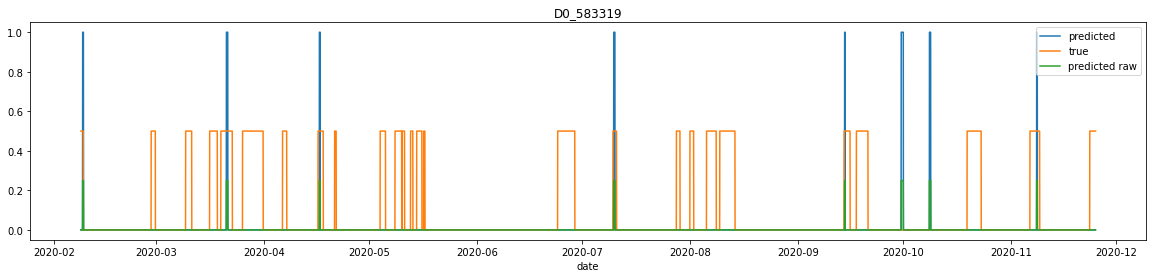

In [13]:
result_threshold.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_threshold = result_threshold.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_threshold_plot = 'sde_event'+best_threshold+'predicted'
best_threshold_plot1 = 'sde_event'+best_threshold


plt.figure(figsize = (20,4))

plt.plot(dataframe_threshold.index, dataframe_threshold[best_threshold_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_threshold.index, dataframe_threshold[best_threshold_plot]*0.25, label = 'predicted raw')


plt.xlabel('date')
plt.title(best_threshold)
plt.legend()
result_threshold.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]




In [14]:
result_interquarile, dataframe_interquartile = classification_results('interquartile', total_dataframe,df_dates, multivariate =False )


/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe[col] = ((dataframe[col]> upper_pc1)| (dataframe[col]< lower_pc1)).astype('int')
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:309: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col+'predicted']=sde_event_1s
/data/user/boiger_r/python_env/aerosol_env_mie/lib/python3.8/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is h

D2_643358  D3_280243  V_D2_643358  V_D3_280243  D0_626839  \
#sde_truth    26.000000  26.000000    26.000000    26.000000  26.000000   
#nosde_truth  25.000000  25.000000    25.000000    25.000000  25.000000   
#sde_pred     49.000000  47.000000    49.000000    47.000000  44.000000   
#nosde_pred   50.000000  48.000000    50.000000    48.000000  45.000000   
TP            21.000000  21.000000    21.000000    21.000000  20.000000   
FN             5.000000   5.000000     5.000000     5.000000   6.000000   
TN            17.000000  17.000000    17.000000    17.000000  17.000000   
FP             8.000000   8.000000     8.000000     8.000000   8.000000   
accuracy       0.745098   0.745098     0.745098     0.745098   0.725490   
precision      0.724138   0.724138     0.724138     0.724138   0.714286   
recall         0.807692   0.807692     0.807692     0.807692   0.769231   
specificity    0.680000   0.680000     0.680000     0.680000   0.680000   
F1             0.763636   0.763636     0.763636     0.763636   0.740741   

              D2_840573  D3_052502  D3_524975  V_D0_626839  V_D2_840573  
#sde_truth    26.000000  26.000000  26.000000    26.000000    26.000000  
#nosde_truth  25.000000  25.000000  25.000000    25.000000    25.000000  
#sde_pred     46.000000  47.000000  48.000000    44.000000    46.000000  
#nosde_pred   47.000000  48.000000  49.000000    45.000000    47.000000  
TP            20.000000  20.000000  20.000000    20.000000    20.000000  
FN             6.000000   6.000000   6.000000     6.000000     6.000000  
TN            17.000000  17.000000  17.000000    17.000000    17.000000  
FP             8.000000   8.000000   8.000000     8.000000     8.000000  
accuracy       0.725490   0.725490   0.725490     0.725490     0.725490  
precision      0.714286   0.714286   0.714286     0.714286     0.714286  
recall         0.769231   0.769231   0.769231     0.769231     0.769231  
specificity    0.680000   0.680000   0.680000     0.680000     0.680000  
F1             0.740741   0.740741   0.740741     0.740741     0.740741

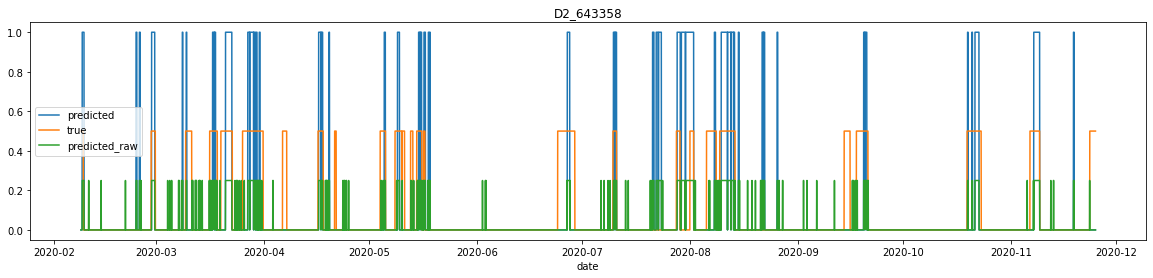

In [15]:
result_interquarile.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_interquarile = result_interquarile.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_interquarile_plot = 'sde_event'+best_interquarile+'predicted'
best_interquarile_plot1 = 'sde_event'+best_interquarile


plt.figure(figsize = (20,4))

plt.plot(dataframe_interquartile.index, dataframe_interquartile[best_interquarile_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_interquartile.index, dataframe_interquartile[best_interquarile_plot1]*0.25, label = 'predicted_raw')


plt.xlabel('date')
plt.title(best_interquarile)
plt.legend()
result_interquarile.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]





In [16]:
dataframe_interquartile

sde_eventN_N11  sde_eventBsB_S12  sde_eventBsG_S12  \
2020-02-08 14:00:00               0                 0                 0   
2020-02-08 15:00:00               0                 0                 0   
2020-02-08 16:00:00               0                 0                 0   
2020-02-08 17:00:00               0                 0                 0   
2020-02-08 18:00:00               0                 0                 0   
...                             ...               ...               ...   
2020-11-24 23:00:00               0                 0                 0   
2020-11-25 00:00:00               0                 0                 0   
2020-11-25 01:00:00               0                 0                 0   
2020-11-25 02:00:00               0                 0                 0   
2020-11-25 03:00:00               0                 0                 0   

                     sde_eventBsR_S12  sde_eventBbsB_S12  sde_eventBbsG_S12  \
2020-02-08 14:00:00                 0                  0                  0   
2020-02-08 15:00:00                 0                  0                  0   
2020-02-08 16:00:00                 0                  0                  0   
2020-02-08 17:00:00                 0                  0                  0   
2020-02-08 18:00:00                 0                  0                  0   
...                               ...                ...                ...   
2020-11-24 23:00:00                 0                  0                  0   
2020-11-25 00:00:00                 0                  0                  0   
2020-11-25 01:00:00                 0                  0                  0   
2020-11-25 02:00:00                 0                  0                  0   
2020-11-25 03:00:00                 0                  0                  0   

                     sde_eventBbsR_S12  sde_eventBaCorr2_A13  \
2020-02-08 14:00:00                  0                     0   
2020-02-08 15:00:00                  0                     0   
2020-02-08 16:00:00                  0                     0   
2020-02-08 17:00:00                  0                     0   
2020-02-08 18:00:00                  0                     0   
...                                ...                   ...   
2020-11-24 23:00:00                  0                     0   
2020-11-25 00:00:00                  0                     0   
2020-11-25 01:00:00                  0                     0   
2020-11-25 02:00:00                  0                     0   
2020-11-25 03:00:00                  0                     0   

                     sde_eventBaCorr3_A13  sde_eventBaCorr4_A13  ...  \
2020-02-08 14:00:00                     0                     0  ...   
2020-02-08 15:00:00                     0                     0  ...   
2020-02-08 16:00:00                     0                     0  ...   
2020-02-08 17:00:00                     0                     0  ...   
2020-02-08 18:00:00                     0                     0  ...   
...                                   ...                   ...  ...   
2020-11-24 23:00:00                     0                     0  ...   
2020-11-25 00:00:00                     0                     0  ...   
2020-11-25 01:00:00                     0                     0  ...   
2020-11-25 02:00:00                     0                     0  ...   
2020-11-25 03:00:00                     0                     0  ...   

                     no_sde_eventV_bigger500predicted_nr  \
2020-02-08 14:00:00                                    1   
2020-02-08 15:00:00                                    1   
2020-02-08 16:00:00                                    1   
2020-02-08 17:00:00                                    1   
2020-02-08 18:00:00                                    1   
...                                                  ...   
2020-11-24 23:00:00                                   46   
2020-11-25 00:00:00                                   46 

In [17]:
result_kmeans, dataframe_kmeans = classification_results('kmeans', total_dataframe,df_dates, multivariate =False )



/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = (distance >=threshold).astype(int)
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:90: PerformanceWarning: DataFrame is highl

D0_055232  D0_059352  D0_061527  V_D0_055232  V_D0_059352  \
#sde_truth    26.000000  26.000000  26.000000    26.000000    26.000000   
#nosde_truth  25.000000  25.000000  25.000000    25.000000    25.000000   
#sde_pred     81.000000  81.000000  80.000000    81.000000    81.000000   
#nosde_pred   82.000000  82.000000  81.000000    82.000000    82.000000   
TP            20.000000  20.000000  20.000000    20.000000    20.000000   
FN             6.000000   6.000000   6.000000     6.000000     6.000000   
TN             9.000000   9.000000   9.000000     9.000000     9.000000   
FP            16.000000  16.000000  16.000000    16.000000    16.000000   
accuracy       0.568627   0.568627   0.568627     0.568627     0.568627   
precision      0.555556   0.555556   0.555556     0.555556     0.555556   
recall         0.769231   0.769231   0.769231     0.769231     0.769231   
specificity    0.360000   0.360000   0.360000     0.360000     0.360000   
F1             0.645161   0.645161   0.645161     0.645161     0.645161   

              V_D0_061527  D18_446161  D19_822390  D21_301296  D22_890539  
#sde_truth      26.000000   26.000000   26.000000   26.000000   26.000000  
#nosde_truth    25.000000   25.000000   25.000000   25.000000   25.000000  
#sde_pred       80.000000  373.000000  373.000000  373.000000  373.000000  
#nosde_pred     81.000000  373.000000  373.000000  373.000000  373.000000  
TP              20.000000   26.000000   26.000000   26.000000   26.000000  
FN               6.000000    0.000000    0.000000    0.000000    0.000000  
TN               9.000000    2.000000    2.000000    2.000000    2.000000  
FP              16.000000   23.000000   23.000000   23.000000   23.000000  
accuracy         0.568627    0.549020    0.549020    0.549020    0.549020  
precision        0.555556    0.530612    0.530612    0.530612    0.530612  
recall           0.769231    1.000000    1.000000    1.000000    1.000000  
specificity      0.360000    0.080000    0.080000    0.080000    0.080000  
F1               0.645161    0.693333    0.693333    0.693333    0.693333

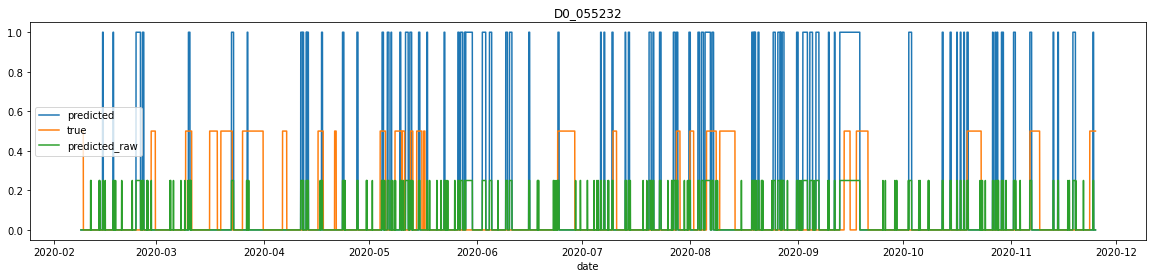

In [18]:
result_kmeans.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_kmeans = result_kmeans.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_kmeans_plot = 'sde_event'+best_kmeans+'predicted'
best_kmeans_plot1 = 'sde_event'+best_kmeans


plt.figure(figsize = (20,4))

plt.plot(dataframe_kmeans.index, dataframe_kmeans[best_kmeans_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_kmeans.index, dataframe_kmeans[best_kmeans_plot1]*0.25, label = 'predicted_raw')


plt.xlabel('date')
plt.title(best_kmeans)
plt.legend()
result_kmeans.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]





In [19]:
result_IF, dataframe_IF = classification_results('isolation_forest', total_dataframe,df_dates, multivariate =False )



/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usua

D0_018106   D0_016849   D0_018769   D0_019456   D0_020169  \
#sde_truth     26.000000   26.000000   26.000000   26.000000   26.000000   
#nosde_truth   25.000000   25.000000   25.000000   25.000000   25.000000   
#sde_pred     284.000000  306.000000  294.000000  292.000000  299.000000   
#nosde_pred   284.000000  305.000000  293.000000  291.000000  298.000000   
TP             27.000000   27.000000   27.000000   27.000000   27.000000   
FN             -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
TN              2.000000    1.000000    1.000000    1.000000    1.000000   
FP             23.000000   24.000000   24.000000   24.000000   24.000000   
accuracy        0.568627    0.549020    0.549020    0.549020    0.549020   
precision       0.540000    0.529412    0.529412    0.529412    0.529412   
recall          1.038462    1.038462    1.038462    1.038462    1.038462   
specificity     0.080000    0.040000    0.040000    0.040000    0.040000   
F1              0.710526    0.701299    0.701299    0.701299    0.701299   

               D0_020908   D0_044508  D11_978599  D22_890539  V_D0_016849  
#sde_truth     26.000000   26.000000   26.000000   26.000000    26.000000  
#nosde_truth   25.000000   25.000000   25.000000   25.000000    25.000000  
#sde_pred     294.000000  190.000000  316.000000  321.000000   308.000000  
#nosde_pred   293.000000  189.000000  316.000000  321.000000   307.000000  
TP             27.000000   27.000000   27.000000   27.000000    27.000000  
FN             -1.000000   -1.000000   -1.000000   -1.000000    -1.000000  
TN              1.000000    1.000000    1.000000    1.000000     1.000000  
FP             24.000000   24.000000   24.000000   24.000000    24.000000  
accuracy        0.549020    0.549020    0.549020    0.549020     0.549020  
precision       0.529412    0.529412    0.529412    0.529412     0.529412  
recall          1.038462    1.038462    1.038462    1.038462     1.038462  
specificity     0.040000    0.040000    0.040000    0.040000     0.040000  
F1              0.701299    0.701299    0.701299    0.701299     0.701299

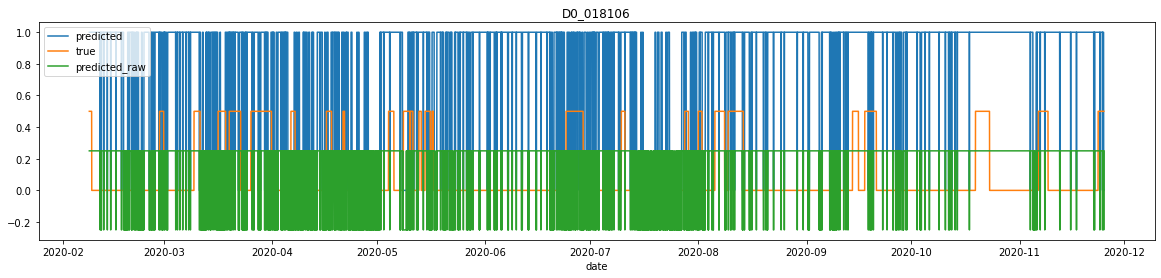

In [20]:
result_IF.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_IF = result_IF.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_IF_plot = 'sde_event'+best_IF+'predicted'
best_IF_plot1 = 'sde_event'+best_IF


plt.figure(figsize = (20,4))

plt.plot(dataframe_IF.index, dataframe_IF[best_IF_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_IF.index, dataframe_IF[best_IF_plot1]*0.25, label = 'predicted_raw')


plt.xlabel('date')
plt.title(best_IF)
plt.legend()
result_IF.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]




In [21]:
result_OCSVM, dataframe_OCSVM = classification_results('OCSVM', total_dataframe,df_dates, multivariate =False )




/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usua

D6_268390  V_D6_268390  D5_833189  V_D5_833189  D12_872296  \
#sde_truth    26.000000    26.000000  26.000000    26.000000   26.000000   
#nosde_truth  25.000000    25.000000  25.000000    25.000000   25.000000   
#sde_pred     71.000000    71.000000  80.000000    80.000000   63.000000   
#nosde_pred   72.000000    72.000000  81.000000    81.000000   64.000000   
TP            21.000000    21.000000  22.000000    22.000000   16.000000   
FN             5.000000     5.000000   4.000000     4.000000   10.000000   
TN            11.000000    11.000000   9.000000     9.000000   15.000000   
FP            14.000000    14.000000  16.000000    16.000000   10.000000   
accuracy       0.627451     0.627451   0.607843     0.607843    0.607843   
precision      0.600000     0.600000   0.578947     0.578947    0.615385   
recall         0.807692     0.807692   0.846154     0.846154    0.615385   
specificity    0.440000     0.440000   0.360000     0.360000    0.600000   
F1             0.688525     0.688525   0.687500     0.687500    0.615385   

              V_D12_872296  BaCorr2_A13  BaCorr3_A13    babs_550    D0_49581  
#sde_truth       26.000000    26.000000    26.000000   26.000000   26.000000  
#nosde_truth     25.000000    25.000000    25.000000   25.000000   25.000000  
#sde_pred        63.000000   219.000000   224.000000  213.000000  284.000000  
#nosde_pred      64.000000   220.000000   225.000000  214.000000  285.000000  
TP               16.000000    27.000000    27.000000   27.000000   27.000000  
FN               10.000000    -1.000000    -1.000000   -1.000000   -1.000000  
TN               15.000000     3.000000     3.000000    3.000000    3.000000  
FP               10.000000    22.000000    22.000000   22.000000   22.000000  
accuracy          0.607843     0.588235     0.588235    0.588235    0.588235  
precision         0.615385     0.551020     0.551020    0.551020    0.551020  
recall            0.615385     1.038462     1.038462    1.038462    1.038462  
specificity       0.600000     0.120000     0.120000    0.120000    0.120000  
F1                0.615385     0.720000     0.720000    0.720000    0.720000

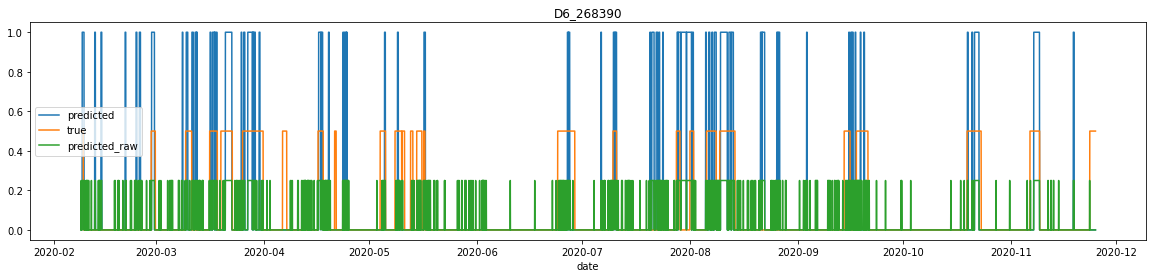

In [22]:
result_OCSVM.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_OCSVM = result_OCSVM.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_OCSVM_plot = 'sde_event'+best_OCSVM+'predicted'
best_OCSVM_plot1 = 'sde_event'+best_OCSVM


plt.figure(figsize = (20,4))

plt.plot(dataframe_OCSVM.index, dataframe_OCSVM[best_OCSVM_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_OCSVM.index, dataframe_OCSVM[best_OCSVM_plot1]*0.25, label = 'predicted_raw')


plt.xlabel('date')
plt.title(best_OCSVM)
plt.legend()
result_OCSVM.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]





In [23]:
result_OCSVM_SGD, dataframe_OCSVM_SGD = classification_results('OCSVM_SGD', total_dataframe,df_dates, multivariate =False )



/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col] = dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usua

/data/user/boiger_r/python_env/aerosol_env_mie/lib/python3.8/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


D0_41418  V_D18_446161  V_D19_822390  V_D21_301296  \
#sde_truth     26.000000     26.000000     26.000000     26.000000   
#nosde_truth   25.000000     25.000000     25.000000     25.000000   
#sde_pred     235.000000    373.000000    373.000000    373.000000   
#nosde_pred   234.000000    373.000000    373.000000    373.000000   
TP             26.000000     26.000000     26.000000     26.000000   
FN              0.000000      0.000000      0.000000      0.000000   
TN              2.000000      2.000000      2.000000      2.000000   
FP             23.000000     23.000000     23.000000     23.000000   
accuracy        0.549020      0.549020      0.549020      0.549020   
precision       0.530612      0.530612      0.530612      0.530612   
recall          1.000000      1.000000      1.000000      1.000000   
specificity     0.080000      0.080000      0.080000      0.080000   
F1              0.693333      0.693333      0.693333      0.693333   

              V_D22_890539  V_D24_598352  V_D26_433582       tot_V  \
#sde_truth       26.000000     26.000000     26.000000   26.000000   
#nosde_truth     25.000000     25.000000     25.000000   25.000000   
#sde_pred       373.000000    373.000000    373.000000  221.000000   
#nosde_pred     373.000000    373.000000    373.000000  221.000000   
TP               26.000000     26.000000     26.000000   26.000000   
FN                0.000000      0.000000      0.000000    0.000000   
TN                2.000000      2.000000      2.000000    2.000000   
FP               23.000000     23.000000     23.000000   23.000000   
accuracy          0.549020      0.549020      0.549020    0.549020   
precision         0.530612      0.530612      0.530612    0.530612   
recall            1.000000      1.000000      1.000000    1.000000   
specificity       0.080000      0.080000      0.080000    0.080000   
F1                0.693333      0.693333      0.693333    0.693333   

               D0_020169   D0_020908  
#sde_truth     26.000000   26.000000  
#nosde_truth   25.000000   25.000000  
#sde_pred     273.000000  254.000000  
#nosde_pred   273.000000  254.000000  
TP             25.000000   25.000000  
FN              1.000000    1.000000  
TN              3.000000    3.000000  
FP             22.000000   22.000000  
accuracy        0.549020    0.549020  
precision       0.531915    0.531915  
recall          0.961538    0.961538  
specificity     0.120000    0.120000  
F1              0.684932    0.684932

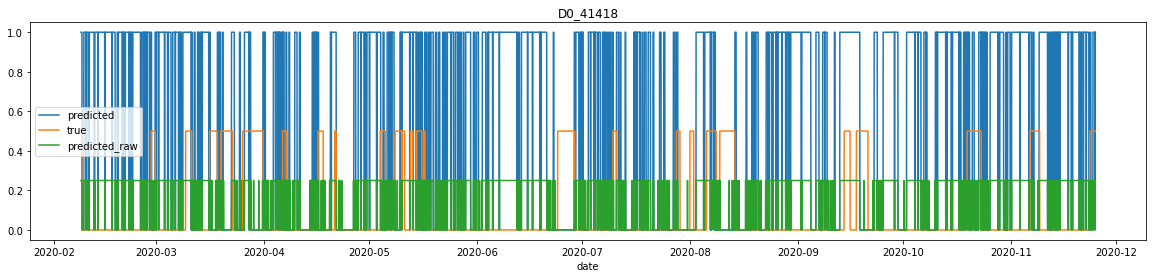

In [24]:
result_OCSVM_SGD.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_OCSVM_SGD = result_OCSVM_SGD.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_OCSVM_SGD_plot = 'sde_event'+best_OCSVM_SGD+'predicted'
best_OCSVM_SGD_plot1 = 'sde_event'+best_OCSVM_SGD


plt.figure(figsize = (20,4))

plt.plot(dataframe_OCSVM_SGD.index, dataframe_OCSVM_SGD[best_OCSVM_SGD_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_OCSVM_SGD.index, dataframe_OCSVM_SGD[best_OCSVM_SGD_plot1]*0.25, label = 'predicted_raw')


plt.xlabel('date')
plt.title(best_OCSVM_SGD)
plt.legend()
result_OCSVM_SGD.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]





In [25]:
result_LOF, dataframe_LOF = classification_results('LOF', total_dataframe,df_dates, multivariate =False )



/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  anomaly_dataframe['sde_event'+col]=dataframe['result']
/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/unsupervised_methods.py:230: PerformanceWarning: DataFrame is highly fragmented.  This is usually 

/data/user/boiger_r/jungfrau/jungfraujoch_machinelearning/evaluation.py:309: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe[col+'predicted']=sde_event_1s
/data/user/boiger_r/python_env/aerosol_env_mie/lib/python3.8/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


D5_833189  V_D5_833189  V_D7_778682  D8_359033  V_D4_070578  \
#sde_truth    26.000000    26.000000    26.000000  26.000000    26.000000   
#nosde_truth  25.000000    25.000000    25.000000  25.000000    25.000000   
#sde_pred     57.000000    55.000000    27.000000  28.000000    28.000000   
#nosde_pred   58.000000    56.000000    28.000000  29.000000    29.000000   
TP            17.000000    17.000000    16.000000  15.000000    15.000000   
FN             9.000000     9.000000    10.000000  11.000000    11.000000   
TN            16.000000    16.000000    17.000000  18.000000    18.000000   
FP             9.000000     9.000000     8.000000   7.000000     7.000000   
accuracy       0.647059     0.647059     0.647059   0.647059     0.647059   
precision      0.653846     0.653846     0.666667   0.681818     0.681818   
recall         0.653846     0.653846     0.615385   0.576923     0.576923   
specificity    0.640000     0.640000     0.680000   0.720000     0.720000   
F1             0.653846     0.653846     0.640000   0.625000     0.625000   

              D7_238624  V_D7_238624  D4_070578  D7_778682  V_D8_359033  
#sde_truth    26.000000    26.000000  26.000000  26.000000    26.000000  
#nosde_truth  25.000000    25.000000  25.000000  25.000000    25.000000  
#sde_pred     49.000000    46.000000  28.000000  24.000000    31.000000  
#nosde_pred   50.000000    47.000000  29.000000  25.000000    32.000000  
TP            18.000000    18.000000  15.000000  15.000000    14.000000  
FN             8.000000     8.000000  11.000000  11.000000    12.000000  
TN            14.000000    14.000000  17.000000  17.000000    18.000000  
FP            11.000000    11.000000   8.000000   8.000000     7.000000  
accuracy       0.627451     0.627451   0.627451   0.627451     0.627451  
precision      0.620690     0.620690   0.652174   0.652174     0.666667  
recall         0.692308     0.692308   0.576923   0.576923     0.538462  
specificity    0.560000     0.560000   0.680000   0.680000     0.720000  
F1             0.654545     0.654545   0.612245   0.612245     0.595745

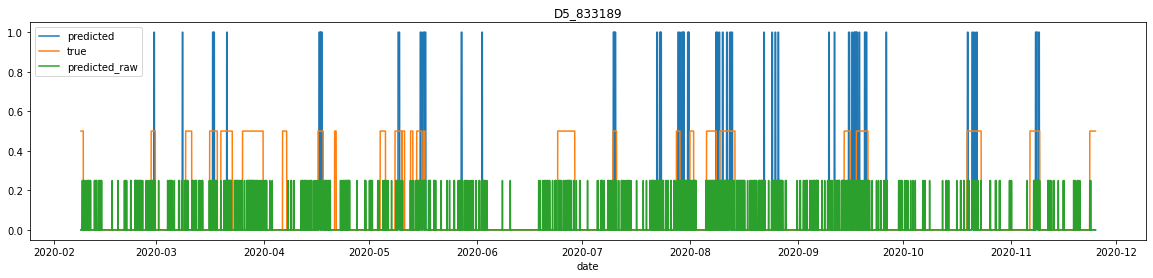

In [26]:
result_LOF.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]

best_LOF = result_LOF.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0].name
best_LOF_plot = 'sde_event'+best_LOF+'predicted'
best_LOF_plot1 = 'sde_event'+best_LOF


plt.figure(figsize = (20,4))

plt.plot(dataframe_LOF.index, dataframe_LOF[best_LOF_plot], label = 'predicted')
plt.plot(df_dates['DateTimeUTC'],df_dates['sde_event']*0.5, label ='true')
plt.plot(dataframe_LOF.index, dataframe_LOF[best_LOF_plot1]*0.25, label = 'predicted_raw')


plt.xlabel('date')
plt.title(best_LOF)
plt.legend()
result_LOF.sort_values(['accuracy','TP'],axis = 1, ascending = False).iloc[:,0:10]


